In [1]:
import pandas as pd

In [2]:
import re
import nltk
import string

import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn import naive_bayes

In [6]:
from sklearn.metrics import roc_auc_score

In [7]:
dt= pd.read_csv("file.csv")

In [8]:
dt.head(8)

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
5,5,"Just launched ChatGPT, our new AI system which...",good
6,6,"As of 2 minutes ago, @OpenAI released their ne...",bad
7,7,ChatGPT coming out strong refusing to help me ...,good


In [9]:


dt['labels']=dt['labels'].replace(['neutral', 'good', 'bad'], [0,1,-1])
dt

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,0
1,1,"Try talking with ChatGPT, our new AI system wh...",1
2,2,ChatGPT: Optimizing Language Models for Dialog...,0
3,3,"THRILLED to share that ChatGPT, our new model ...",1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",-1
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,-1
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,1
219291,219291,chatgpt is being disassembled until it can onl...,-1
219292,219292,2023 predictions by #chatGPT. Nothing really s...,-1


In [10]:
dt['labels'].value_counts()

labels
-1    107796
 1     56011
 0     55487
Name: count, dtype: int64

In [88]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.0+ MB


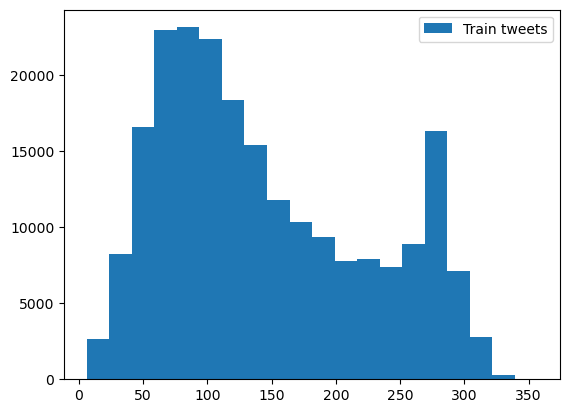

In [12]:
length_train_dataset = dt['tweets'].str.len()
plt.hist(length_train_dataset, bins=20,label="Train tweets")
plt.legend() 
plt.show()

In [13]:
dt['tweets'] = dt['tweets'].apply(lambda x: ' '.join([w for w in x.split() if w.isalpha()])) #removing words whose length is less than 3
dt

,Unnamed: 0,tweets,labels
0,0,Optimizing Language Models for Dialogue,0
1,1,Try talking with our new AI system which is op...,1
2,2,Optimizing Language Models for Dialogue Articl...,0
3,3,THRILLED to share that our new model optimized...,1
4,4,As of minutes released their new you can use i...,-1
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,-1
219290,219290,I asked to write a Joke for SEOs and it did th...,1
219291,219291,chatgpt is being disassembled until it can onl...,-1
219292,219292,predictions by Nothing really just some trends...,-1


In [14]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [15]:
def stem(text):
    texts= text.split()
    txt = [ps.stem(i)for i in texts]
    final_text = " ".join (txt)
    return final_text

In [23]:
dt['tweets'] = dt['tweets'].apply(stem)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')



In [25]:


# Fit and transform the text data
x = cv.fit_transform(dt['tweets'])


In [26]:
y= dt.labels

In [27]:
y

0         0
1         1
2         0
3         1
4        -1
         ..
219289   -1
219290    1
219291   -1
219292   -1
219293    0
Name: labels, Length: 219294, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

In [29]:
clf = naive_bayes.MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [30]:


roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')




0.8274134532323744

In [32]:
reviews= np.array(["food is bad"])
vector = cv.transform(reviews)
clf.predict(vector)

array([-1], dtype=int64)

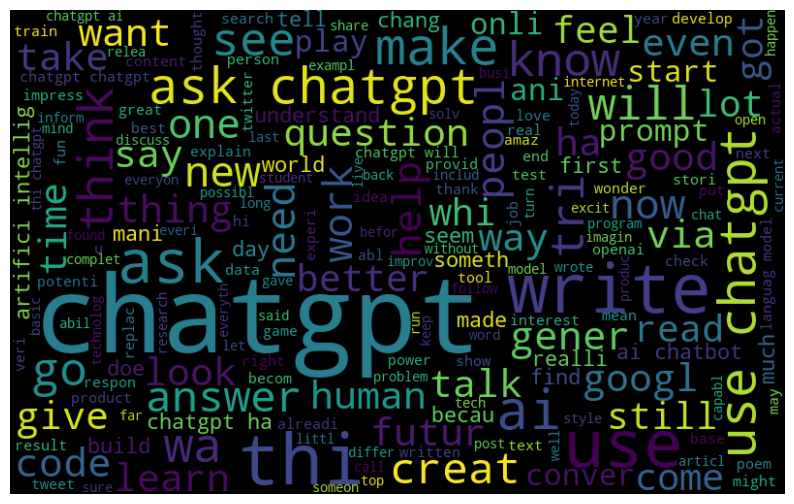

In [33]:
from wordcloud import WordCloud

# Assuming dt is a pandas DataFrame and 'tweets' is a column in it
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(dt['tweets']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
